# Predicting if a person will have diabetes or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv('../../../Data Science/DataSets/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#columns that can't be zero
zero_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_column:
    data[col] = data[col].replace(0, np.nan)
    mean = data[col].mean(skipna=True)
    data[col] = data[col].replace(np.nan, mean)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [18]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
sq = int(len(X_test) ** 0.5)
k = sq if sq % 2 == 1 else sq + 1

In [29]:
model = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
model.fit(X_train, y_train)

,n_neighbors,13
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [30]:
y_pred = model.predict(X_test)

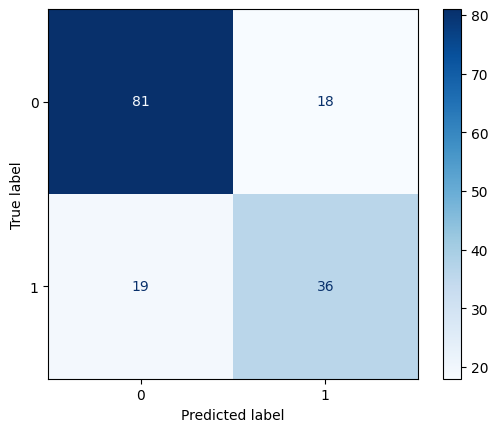

In [31]:
cm = confusion_matrix(y_test, y_pred)
dig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
dig.plot(cmap=plt.cm.Blues)

In [32]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("F1_score: {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.7597402597402597
F1_score: 0.6605504587155964
